In [2]:
library(targets)
library(tarchetypes)
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
df_strict_same = qs::qread('_targets/objects/combined_da_results_all.obobFGF1BL6d5') %>%
select(Nhood, labels, logFC, SpatialFDR, polarity)

df_strict_same %>% head

,Nhood,logFC,SpatialFDR,polarity,labels
,<dbl>,<dbl>,<dbl>,<chr>,<chr>
4...1,4,5.101972,0.0000262161,pos,a1_Tany__Astrocytes
136...2,136,4.334205,0.0001441000,pos,a1_Tany__Astrocytes
32...3,32,3.378774,0.0017017161,pos,a1_Tany__Astrocytes
212...4,212,3.730659,0.0021256655,pos,a1_Tany__Astrocytes
223...5,223,3.300307,0.0021256655,pos,a1_Tany__Astrocytes
227...6,227,-3.336724,0.0021256655,neg,a1_Tany__Astrocytes


In [22]:
df_changed_by_strain = qs::qread('_targets/objects/combined_da_results_all.obobBL6d5') %>%
select(Nhood, labels, logFC, SpatialFDR, polarity)

df_changed_by_strain %>% head

,Nhood,labels,logFC,SpatialFDR,polarity
,<dbl>,<chr>,<dbl>,<dbl>,<chr>
30...1,30,a1_Tany__Astrocytes,-3.424816,8.797502e-05,neg
122...2,122,a1_Tany__Astrocytes,4.401119,1.799509e-03,pos
155...3,155,a1_Tany__Astrocytes,-2.756628,1.799509e-03,neg
167...4,167,a1_Tany__Astrocytes,-3.750028,1.799509e-03,neg
202...5,202,a1_Tany__Astrocytes,-2.984116,1.799509e-03,neg
227...6,227,a1_Tany__Astrocytes,-2.894566,1.799509e-03,neg


In [31]:
df_jenny_restored = left_join(df_strict_same, df_changed_by_strain, by=c("Nhood", "labels"), suffix = c("_strict", "_strain")) %>%
rowwise %>%
mutate(restored = case_when( (polarity_strict == 'none') & (polarity_strain != 'none') ~ 'restored',
                             TRUE ~ paste0(c(polarity_strict, polarity_strain), collapse='__')))

df_jenny_restored %>% head
df_jenny_restored %>% group_by(restored) %>% summarise(n = n())

Nhood,logFC_strict,SpatialFDR_strict,polarity_strict,labels,logFC_strain,SpatialFDR_strain,polarity_strain,restored
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
4,5.101972,0.0000262161,pos,a1_Tany__Astrocytes,0.03485366,0.980963035,none,pos__none
136,4.334205,0.0001441000,pos,a1_Tany__Astrocytes,2.27377081,0.060751593,pos,pos__pos
32,3.378774,0.0017017161,pos,a1_Tany__Astrocytes,-1.45085607,0.247241234,none,pos__none
212,3.730659,0.0021256655,pos,a1_Tany__Astrocytes,0.44788968,0.786082489,none,pos__none
223,3.300307,0.0021256655,pos,a1_Tany__Astrocytes,1.33550919,0.227190251,none,pos__none
227,-3.336724,0.0021256655,neg,a1_Tany__Astrocytes,-2.89456587,0.001799509,neg,neg__neg


restored,n
<chr>,<int>
neg__neg,485
neg__none,214
neg__pos,2
none__none,7116
pos__neg,4
pos__none,270
pos__pos,673
restored,579


In [21]:
df_fgf1 = qs::qread('_targets/objects/combined_da_results_all.obob5v5') %>%
select(Nhood, labels, logFC, SpatialFDR, polarity)

df_fgf1 %>% head

,Nhood,labels,logFC,SpatialFDR,polarity
,<dbl>,<chr>,<dbl>,<dbl>,<chr>
4...1,4,a1_Tany__Astrocytes,5.067119,2.127189e-08,pos
32...2,32,a1_Tany__Astrocytes,4.829630,1.166655e-07,pos
169...3,169,a1_Tany__Astrocytes,3.570608,1.167752e-04,pos
170...4,170,a1_Tany__Astrocytes,3.319312,1.167752e-04,pos
135...5,135,a1_Tany__Astrocytes,3.652577,2.397657e-04,pos
212...6,212,a1_Tany__Astrocytes,3.282769,3.227052e-04,pos


In [33]:
df_petar_restored = left_join(df_fgf1, df_changed_by_strain, by=c("Nhood", "labels"), suffix = c("_fgf1", "_strain")) %>%
rowwise %>%
mutate(restored = case_when( (polarity_fgf1 != 'none') & (polarity_fgf1 != polarity_strain) & (polarity_strain %in% c("pos", "neg")) ~ 'restored',
                             TRUE ~ paste0(c(polarity_fgf1, polarity_strain), collapse='__')))

df_petar_restored %>% head

df_petar_restored %>% group_by(restored) %>% summarise(n = n())

Nhood,labels,logFC_fgf1,SpatialFDR_fgf1,polarity_fgf1,logFC_strain,SpatialFDR_strain,polarity_strain,restored
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
4,a1_Tany__Astrocytes,5.067119,2.127189e-08,pos,0.03485366,0.9809630,none,pos__none
32,a1_Tany__Astrocytes,4.829630,1.166655e-07,pos,-1.45085607,0.2472412,none,pos__none
169,a1_Tany__Astrocytes,3.570608,1.167752e-04,pos,-1.26106027,0.2957835,none,pos__none
170,a1_Tany__Astrocytes,3.319312,1.167752e-04,pos,-0.81660980,0.4954219,none,pos__none
135,a1_Tany__Astrocytes,3.652577,2.397657e-04,pos,-1.52694858,0.2432014,none,pos__none
212,a1_Tany__Astrocytes,3.282769,3.227052e-04,pos,0.44788968,0.7860825,none,pos__none


restored,n
<chr>,<int>
neg__neg,8
neg__none,214
none__neg,581
none__none,7165
none__pos,834
pos__none,221
pos__pos,20
restored,300


In [44]:
df_jenny_restored = df_jenny_restored %>%
select(Nhood, labels, restored)

df_petar_restored = df_petar_restored %>%
select(Nhood, labels, restored)

df_jenny_petar_restored = left_join(df_jenny_restored, df_petar_restored, by=c("Nhood", "labels"), suffix = c("_jenny", "_petar")) %>%
mutate(both_restored = case_when( ( (restored_jenny == 'restored') & (restored_petar == 'restored') ) ~ 'restored',
                                  ( (restored_jenny == restored_petar) & (restored_jenny != 'restored') ) ~ 'same',
                                 TRUE ~ paste0(c(restored_jenny, restored_petar), collapse='-')))
df_jenny_petar_restored %>% head

Nhood,labels,restored_jenny,restored_petar,both_restored
<dbl>,<chr>,<chr>,<chr>,<chr>
4,a1_Tany__Astrocytes,pos__none,pos__none,same
136,a1_Tany__Astrocytes,pos__pos,pos__pos,same
32,a1_Tany__Astrocytes,pos__none,pos__none,same
212,a1_Tany__Astrocytes,pos__none,pos__none,same
223,a1_Tany__Astrocytes,pos__none,pos__none,same
227,a1_Tany__Astrocytes,neg__neg,none__neg,neg__neg-none__neg


In [45]:
dfjpr = df_jenny_petar_restored

In [47]:
dfjpr %>%
group_by(both_restored) %>%
summarise(n=n()) %>% 
arrange(desc(n))


both_restored,n
<chr>,<int>
same,7183
pos__pos-none__pos,626
neg__neg-none__neg,446
restored,236
restored-none__pos,208
restored-none__neg,135
pos__none-none__none,128
neg__none-none__none,119
none__none-neg__none,119


In [2]:
da_results = qs::qread("_targets/objects/combined_da_results_all.obobFGF1BL6d5")
da_results %>% head

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR,polarity,labels,labels_fraction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
4...1,5.101972,12.72236,35.99857,1.014221e-07,2.474699e-05,4,0.0000262161,pos,a1_Tany__Astrocytes,1
136...2,4.334205,12.92670,28.69750,1.229838e-06,1.500402e-04,136,0.0001441000,pos,a1_Tany__Astrocytes,1
32...3,3.378774,12.95063,21.00668,2.176996e-05,1.770623e-03,32,0.0017017161,pos,a1_Tany__Astrocytes,1
212...4,3.730659,12.22852,18.85356,5.414549e-05,2.201917e-03,212,0.0021256655,pos,a1_Tany__Astrocytes,1
223...5,3.300307,12.90746,19.54161,3.891712e-05,2.201917e-03,223,0.0021256655,pos,a1_Tany__Astrocytes,1
227...6,-3.336724,12.73858,19.10562,4.636807e-05,2.201917e-03,227,0.0021256655,neg,a1_Tany__Astrocytes,1


In [48]:
579-236

[1] 343

In [19]:
all_restored_df = qs::qread('_targets/objects/all_restored_df')
all_restored_df %>% head

,labels,Nhood,polarity.BL6,polarity.fgf1,SpatialFDR.BL6,SpatialFDR.fgf1,restored,comparison
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>
1,a1_Tany__Astrocytes,33,none,none,0.1198016,0.3314134,FALSE,all.obob14v14__v__all.obob14vBL6
2,a1_Tany__Astrocytes,63,none,none,0.5873683,0.4520588,FALSE,all.obob14v14__v__all.obob14vBL6
3,a1_Tany__Astrocytes,3,none,none,0.1710337,0.8637071,FALSE,all.obob14v14__v__all.obob14vBL6
4,a1_Tany__Astrocytes,5,none,none,0.7053670,0.8637071,FALSE,all.obob14v14__v__all.obob14vBL6
5,a1_Tany__Astrocytes,6,none,none,0.1493883,0.8637071,FALSE,all.obob14v14__v__all.obob14vBL6
6,a1_Tany__Astrocytes,7,none,none,0.2991722,0.8637071,FALSE,all.obob14v14__v__all.obob14vBL6


In [20]:
all_restored_df %>% pull(comparison) %>% unique

[1] "all.obob14v14__v__all.obob14vBL6"    
 [2] "all.obob14v14__v__all.obob5vBL6"     
 [3] "all.obob14v14__v__all.obobBL6"       
 [4] "all.obob14v14__v__all.obobBL6d14"    
 [5] "all.obob14v14__v__all.obobBL6d5"     
 [6] "all.obob5v5__v__all.obob14vBL6"      
 [7] "all.obob5v5__v__all.obob5vBL6"       
 [8] "all.obob5v5__v__all.obobBL6"         
 [9] "all.obob5v5__v__all.obobBL6d14"      
[10] "all.obob5v5__v__all.obobBL6d5"       
[11] "Day14.obob14v14__v__Day14.obobBL6d14"
[12] "Day5.obob5v5__v__Day5.obobBL6d5"

In [24]:
df_a = da_results %>%
select(Nhood, labels, polarity)

df_b = all_restored_df %>%
filter(comparison == 'all.obob5v5__v__all.obobBL6') %>%
select(Nhood, labels, comparison, polarity.BL6, polarity.fgf1, restored)

restored = full_join(df_a, df_b, by = c("Nhood", "labels"), suffix = c("_strict", "_combined"))
restored %>% head

,Nhood,labels,polarity,comparison,polarity.BL6,polarity.fgf1,restored
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,4,a1_Tany__Astrocytes,pos,all.obob5v5__v__all.obobBL6,none,none,FALSE
2,136,a1_Tany__Astrocytes,pos,all.obob5v5__v__all.obobBL6,pos,neg,TRUE
3,32,a1_Tany__Astrocytes,pos,all.obob5v5__v__all.obobBL6,none,none,FALSE
4,212,a1_Tany__Astrocytes,pos,all.obob5v5__v__all.obobBL6,none,none,FALSE
5,223,a1_Tany__Astrocytes,pos,all.obob5v5__v__all.obobBL6,neg,none,FALSE
6,227,a1_Tany__Astrocytes,neg,all.obob5v5__v__all.obobBL6,none,none,FALSE


In [25]:
restored %>%
filter((polarity == 'none')) %>%
group_by(restored) %>% 
summarise(n = n())

restored,n
<lgl>,<int>
FALSE,7325
TRUE,224
NA,146


In [29]:
restored %>%
filter(restored == TRUE) %>%
group_by(polarity) %>% 
summarise(n = n())

polarity,n
<chr>,<int>
neg,77
none,224
pos,68
NA,2


In [26]:
restored %>%
filter((polarity == 'none')) %>%
group_by(polarity.fgf1) %>% 
summarise(n = n())

polarity.fgf1,n
<chr>,<int>
neg,292
none,7004
pos,253
NA,146


In [27]:
restored %>%
filter(labels == 'Agrp') %>%
filter((polarity == 'none')) %>%
group_by(restored) %>% 
summarise(n = n())

restored,n
<lgl>,<int>
FALSE,46
TRUE,6


In [28]:
restored %>%
filter(labels == 'MOL') %>%
filter((polarity == 'none')) %>%
group_by(polarity.fgf1) %>% 
summarise(n = n())

polarity.fgf1,n
<chr>,<int>
neg,9
none,79
pos,21


Converting group.by to factor...



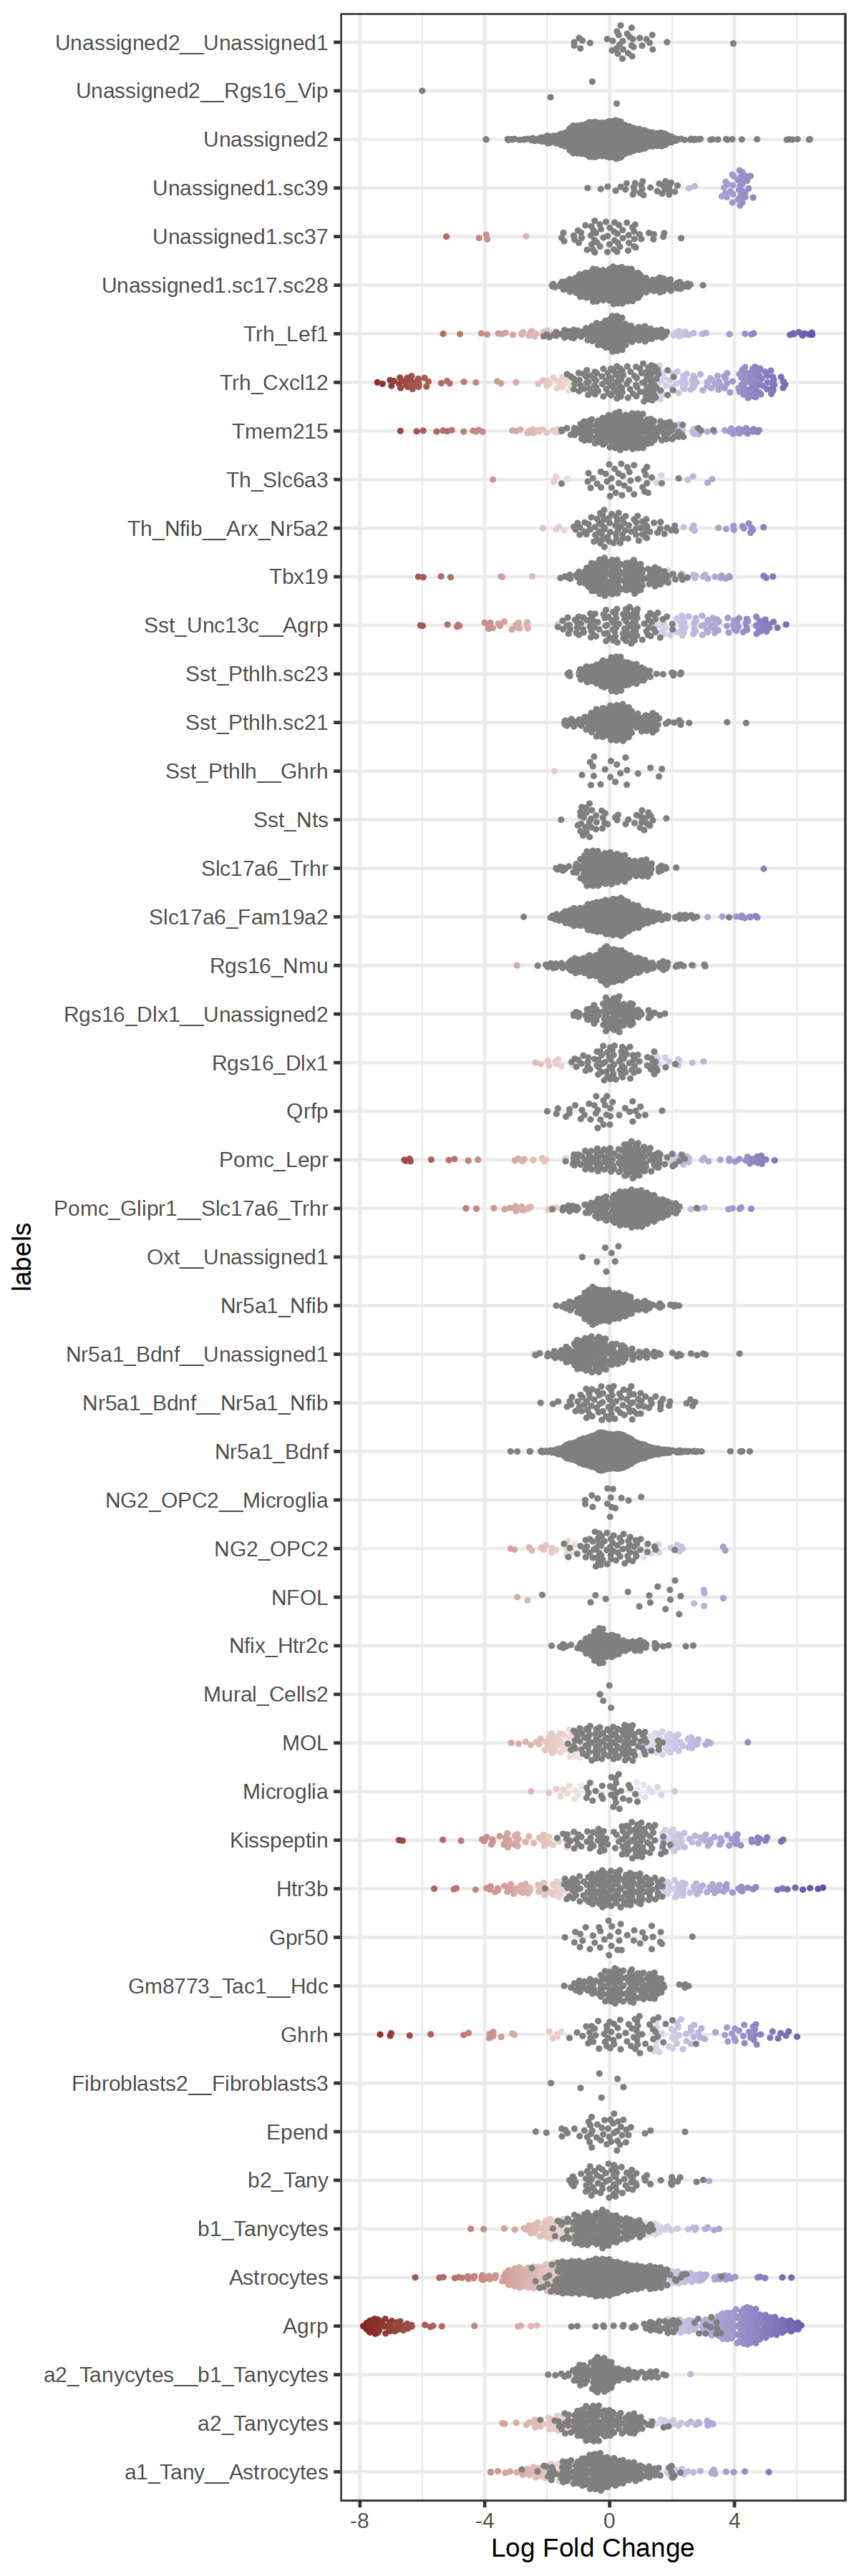

In [3]:
options(repr.plot.width=10, repr.plot.height=30)
miloR::plotDAbeeswarm(da_results, group.by='labels')

In [103]:
da_summary = da_results %>%
group_by(labels, polarity) %>%
summarise(n = n()) %>%
arrange(desc(labels))
da_summary %>% head

`summarise()` has grouped output by 'labels'. You can override using the
`.groups` argument.


labels,polarity,n
<chr>,<chr>,<int>
Unassigned2__Unassigned1,none,35
Unassigned2__Rgs16_Vip,none,4
Unassigned2,none,831
Unassigned1.sc39,none,70
Unassigned1.sc37,none,70
Unassigned1.sc17.sc28,none,250


In [107]:
da_label_groups = da_results %>%
group_by(labels) %>%
summarise(n_group = n()) %>%
arrange(desc(labels))


In [110]:
da_summary = merge(da_summary, da_label_groups)
da_summary %>% head

,labels,n_group,polarity,n
,<chr>,<int>,<chr>,<int>
1,a1_Tany__Astrocytes,243,neg,37
2,a1_Tany__Astrocytes,243,none,183
3,a1_Tany__Astrocytes,243,pos,23
4,a2_Tanycytes,190,neg,8
5,a2_Tanycytes,190,none,160
6,a2_Tanycytes,190,pos,22


In [112]:
da_summary = da_summary %>% mutate(pct_group = n/n_group)
da_summary %>% head

,labels,n_group,polarity,n,pct_group
,<chr>,<int>,<chr>,<int>,<dbl>
1,a1_Tany__Astrocytes,243,neg,37,0.15226337
2,a1_Tany__Astrocytes,243,none,183,0.75308642
3,a1_Tany__Astrocytes,243,pos,23,0.09465021
4,a2_Tanycytes,190,neg,8,0.04210526
5,a2_Tanycytes,190,none,160,0.84210526
6,a2_Tanycytes,190,pos,22,0.11578947


In [138]:
da_summary_sum = da_summary %>% 
  filter(polarity == 'none') %>%
  mutate(pct_group_changed = (n_group - n)/n_group) %>%
  select(-c(polarity, pct_group, n)) %>%
  arrange(desc(pct_group_changed), desc(n_group))
da_summary_sum
  

labels,n_group,pct_group_changed
<chr>,<int>,<dbl>
NFOL,24,0.958333333
NG2_OPC2,90,0.477777778
Astrocytes,607,0.332784185
MOL,189,0.317460317
Htr3b,244,0.307377049
Microglia,59,0.254237288
b1_Tanycytes,233,0.253218884
Trh_Lef1,214,0.252336449
a1_Tany__Astrocytes,243,0.246913580


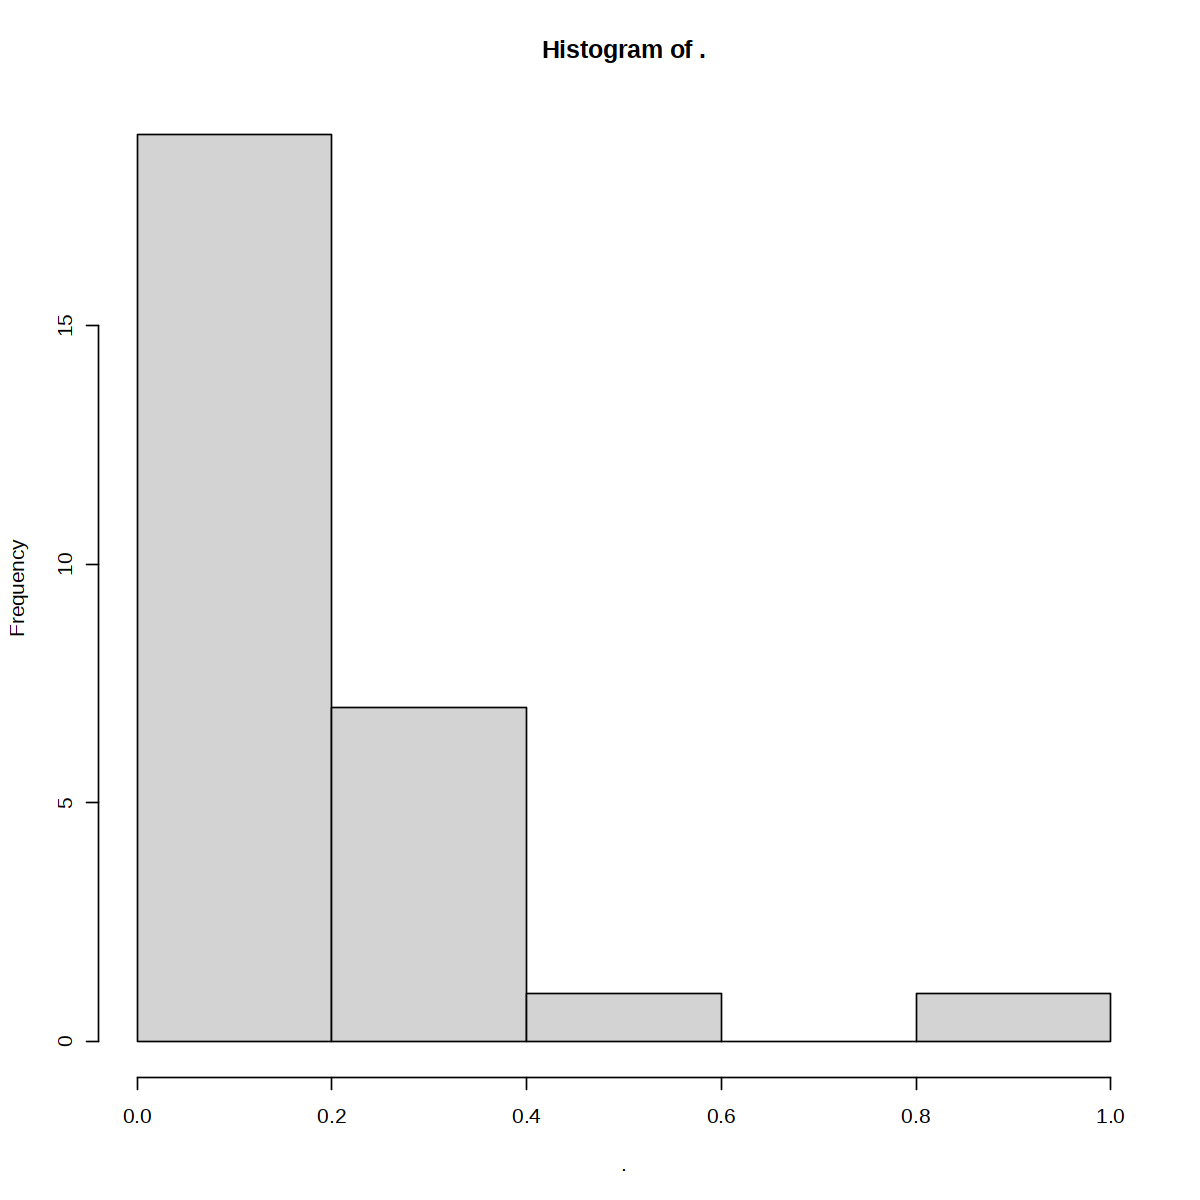

In [122]:
options(repr.plot.width=10, repr.plot.height=10)
da_summary_sum %>% filter(pct_group_changed > 0) %>% pull(pct_group_changed) %>% hist()

In [134]:
da_results$labels = da_summary_sum %>% arrange(pct_group_changed, n_group) %>% pull(labels) %>% factor(da_results$labels, levels=.)

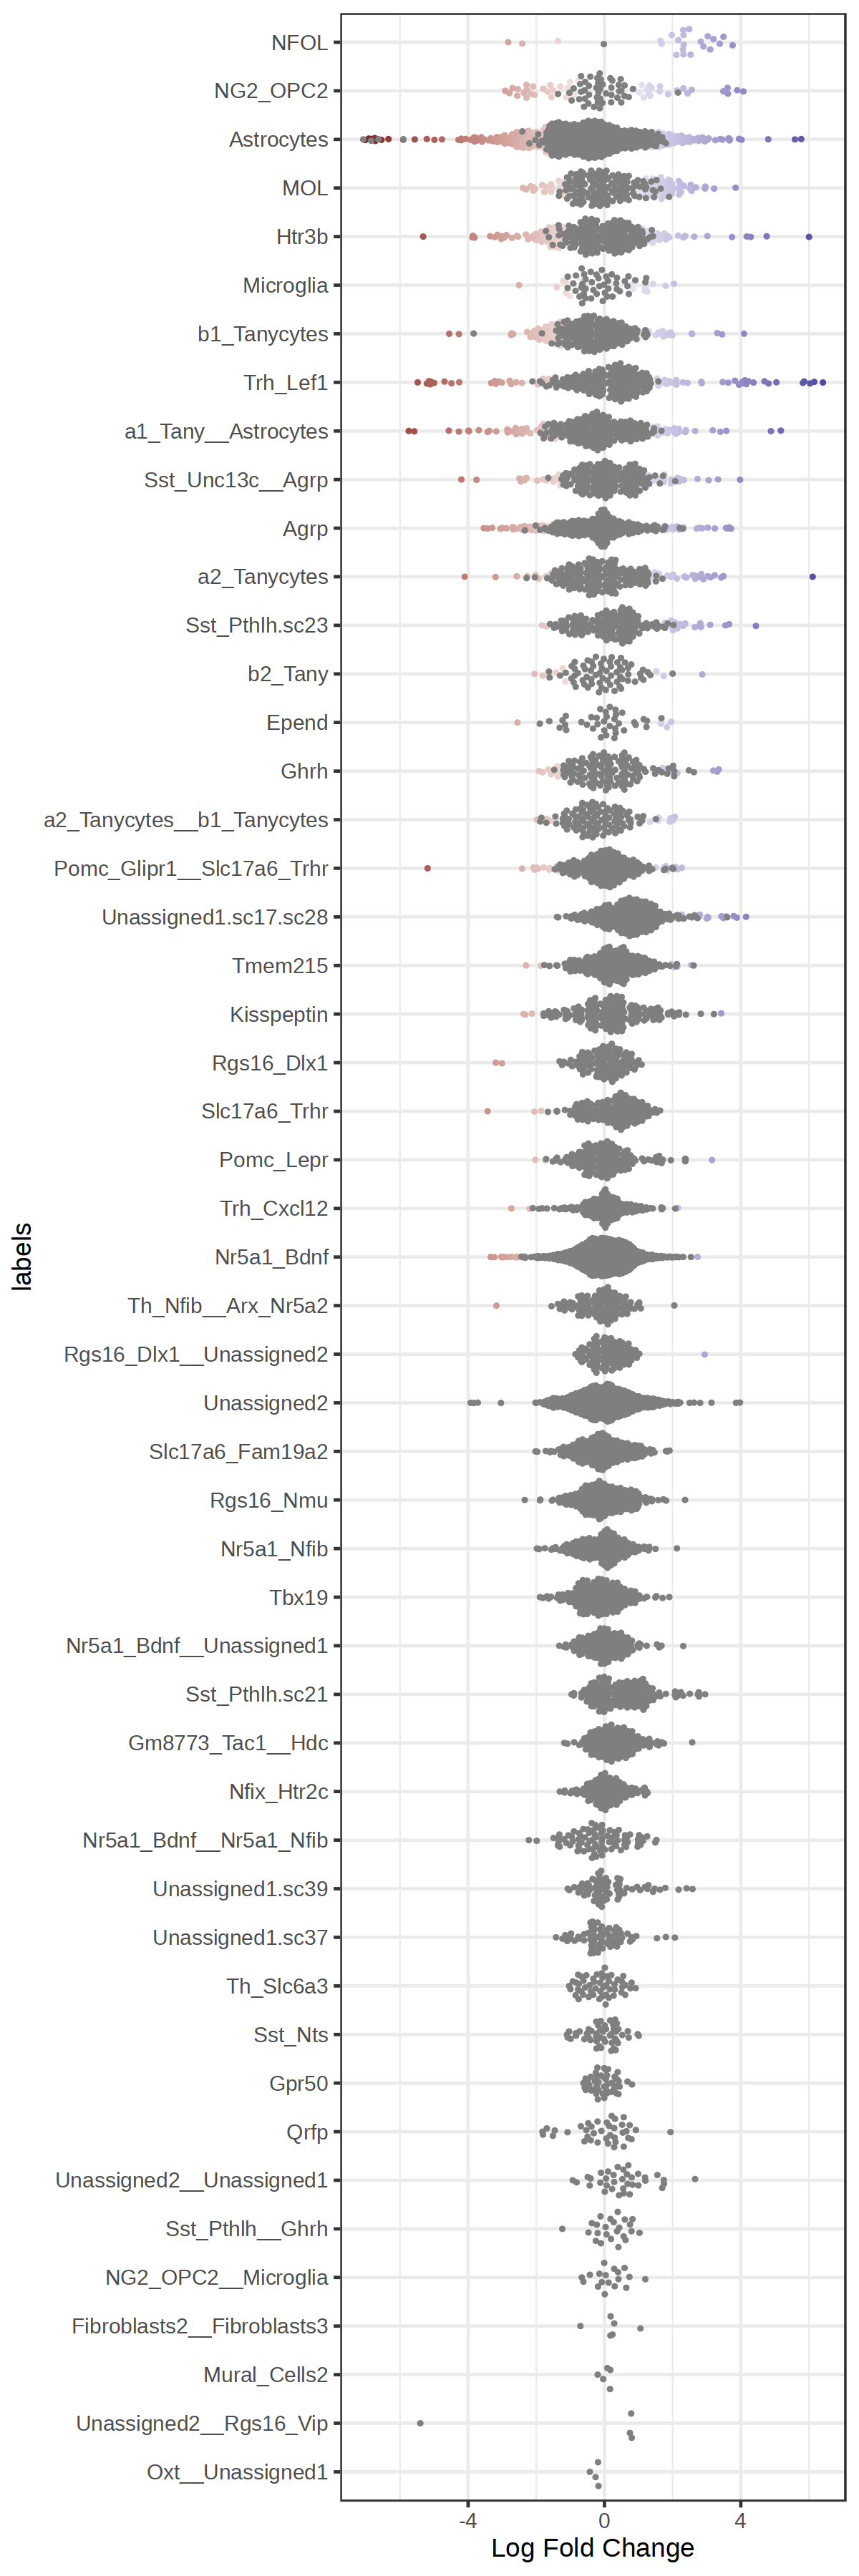

In [135]:
options(repr.plot.width=10, repr.plot.height=30)
miloR::plotDAbeeswarm(da_results, group.by='labels')

In [139]:
da_summary_sum %>% print

                       labels n_group pct_group_changed
1                        NFOL      24       0.958333333
2                    NG2_OPC2      90       0.477777778
3                  Astrocytes     607       0.332784185
4                         MOL     189       0.317460317
5                       Htr3b     244       0.307377049
6                   Microglia      59       0.254237288
7                b1_Tanycytes     233       0.253218884
8                    Trh_Lef1     214       0.252336449
9         a1_Tany__Astrocytes     243       0.246913580
10           Sst_Unc13c__Agrp     202       0.183168317
11                       Agrp     316       0.167721519
12               a2_Tanycytes     190       0.157894737
13             Sst_Pthlh.sc23     160       0.131250000
14                    b2_Tany      74       0.108108108
15                      Epend      41       0.097560976
16                       Ghrh     135       0.096296296
17 a2_Tanycytes__b1_Tanycytes     111       0.09